# Lecture 6

September 18, 2024

**Goal:** To get comfortable using Python sets and dictionaries.

**References:**

* Learn Python in 7 days (Chapter 5 covers dictionaries)
* Computational Mathematics with Sage, 3.3.7-3.3.9

## Mutable versus immutable objects

A *mutable* object can be changed. *Immutable* objects can not change. Examples:
* Numbers are immutable
* Tuples are immutable
* Lists are mutable (you can add to them, etc)

Immutable objects can be *hashed*: The hash of an object is a number uniquely associated to an object. This number doesn't change (over period that a program is run.)

In [1]:
hash(sqrt(2))

7461864723258187528

In [2]:
hash( (1, 2, 3) )

529344067295497451

In [3]:
hash( [1, 2, 3] )

TypeError: unhashable type: 'list'

## Sets

Sets in Python/Sage store unordered collections of immutable objects.

You can define a set in several ways:

In [4]:
s = {1, 2, 4}
s

{1, 2, 4}

You can convert a `list` or other container into a set with `set()`.

In [5]:
hi = 'Hello'
s = set(hi)
s

{'H', 'e', 'l', 'o'}

Note that sets can not contain multiple copies of the same element.

The empty set can be constructed with `set()`:

In [6]:
set()

set()

Membership testing:

In [7]:
'e' in s

True

In [8]:
'z' in s

False

Adding elements:

In [9]:
s.add('!')
s

{'!', 'H', 'e', 'l', 'o'}

Removing:

In [10]:
s.remove('H')
s

{'!', 'e', 'l', 'o'}

Iteration:

In [11]:
for c in s:
    print(c)

!
o
l
e


In [12]:
for i, c in enumerate(s):
    print(f'Character {i} is "{c}"')

Character 0 is "!"
Character 1 is "o"
Character 2 is "l"
Character 3 is "e"


The number of elements in a sen is accessible with the `len` function:

In [13]:
len(s)

4

## Dictionaries

Represents a function mapping some finite collection of immutable objects to arbitrary objects. The objects in the domain are called *keys*. Objects in the range are called *values*.

Construction:

In [14]:
d = {1: 2, 'a': sqrt(2)}
d

{1: 2, 'a': sqrt(2)}

It is also possible to construct using the `dict` method:

In [15]:
dict(name = "John", age = 36, country = "Norway")

{'name': 'John', 'age': 36, 'country': 'Norway'}

Evaluation of the function:

In [16]:
d[1]

2

In [17]:
d['a']

sqrt(2)

Adding a new value:

In [18]:
d[42] = 'everything'
d

{1: 2, 'a': sqrt(2), 42: 'everything'}

Changing:

In [19]:
d[1] = pi
d

{1: pi, 'a': sqrt(2), 42: 'everything'}

Removing a key:

In [20]:
del d[42]

In [21]:
d

{1: pi, 'a': sqrt(2)}

The number of elements in a dictionary is accessible with `len`:

In [22]:
len(d)

2

**Iteration:**
A for loop iterates through the keys:

In [23]:
for key in d:
    print(key)

1
a


In [24]:
for key in d:
    value = d[key]
    print(f'{key} maps to {value}')

1 maps to pi
a maps to sqrt(2)


You can also iterate through `(key, value)` pairs:

In [25]:
for pair in d.items():
    print(pair)

(1, pi)
('a', sqrt(2))


It is more useful to split the pair in the for loop syntax:

In [26]:
for key, value in d.items():
    print(f'{key} maps to {value}')

1 maps to pi
a maps to sqrt(2)


### Example: Sieve of Eratosthenes

This is a standard algorithm that computes all primes up to some integer $n$.

This follows [the wikipedia article](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) which gives the algorithm:

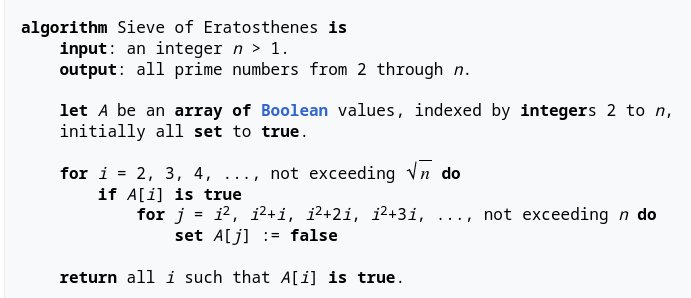

In [27]:
n = 100

In [28]:
A = {} # Initialize as empty dictionary
for i in srange(2, n+1):
    A[i] = True

In [29]:
for i in srange(2, sqrt(n)+1):
    if A[i]:
        #print(f'Removing multiples of {i}')
        for j in srange(i^2, n+1, i):
            #print(f'Removing {j}')
            A[j] = False

In [30]:
primes = []
for i,b in A.items():
    if b:
        primes.append(i)
primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### Example: Representing and visualizing directed graphs

Sage has an `arrow` method for drawing 2D and 3D vectors. To learn more see [Sage's documentation of arrows](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/arrow.html).

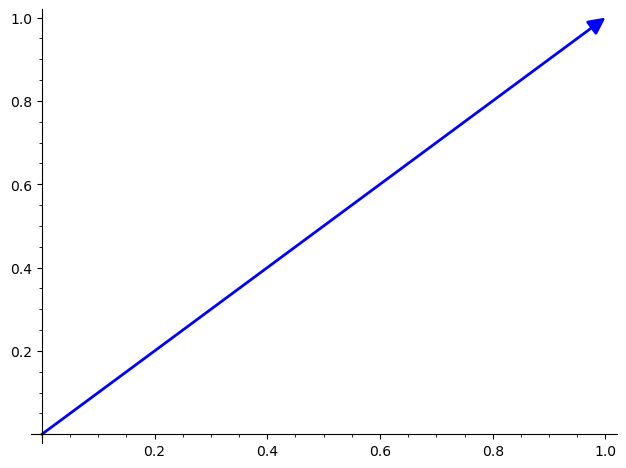

In [31]:
arrow((0,0), (1,1))

We'll use two dictionaries to draw a directed graph. One with point positions, and one for edges.

In [32]:
points = {'A': (0,0), 'B': (1, 0), 'C': (1/2, sqrt(3)/2)}

We can use the `text` function to position text in the plane.

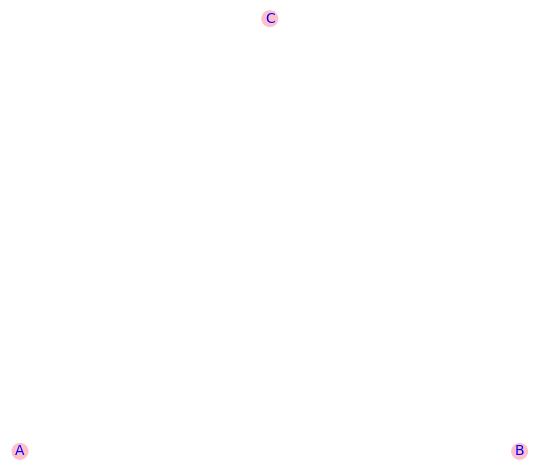

In [33]:
plt = point(points.values(), size=150, aspect_ratio=1, color='pink', axes=False, zorder=10)
for key,pt in points.items():
    plt += text(key, pt,zorder=11)
plt

Edges will be a dictionary mapping a vertex $v$ to a set of endpoints of edges leaving $v$. We start with this edge set empty, and then add some edges.

In [34]:
edges = {}
for v in points:
    edges[v] = set()

In [36]:
edges['A'].add('B')
edges['A'].add('C')
edges['B'].add('A')
edges['C'].add('B')

In [37]:
edges

{'A': {'B', 'C'}, 'B': {'A'}, 'C': {'B'}}

Finally we can draw the directed graph:

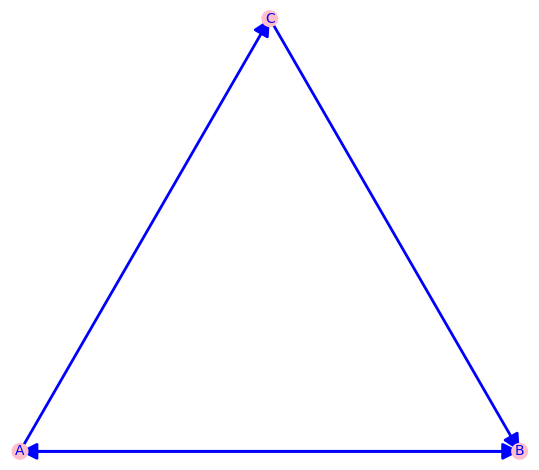

In [39]:
plt = point(points.values(), size=150, aspect_ratio=1, color='pink', axes=False, zorder=10)
for key,pt in points.items():
    plt += text(key, pt,zorder=11)
for v0 in points:
    for v1 in edges[v0]:
        plt += arrow(points[v0], points[v1])
plt